In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
item = {
    1: 3.4473776663649414,
    2: 3.4363795328732003,
    3: 3.4375443401531682,
    4: 3.437740978216511,
    5: 3.43701017412859
}
user = {
    1: 3.47482277291209,
    5: 3.102104707939044,
    10: 2.8704025080894424,
    50: 2.3794292558144305,
    100: 2.339982235304019
}
content = {
    1.0: 0.982660702556376,
    0.5: 1.0178050756120771,
    0.2: 1.0818017860741904,
    0.1: 1.1477809510849422,
    0.05: 1.232578407031943,
    0.02: 1.3792149364310835,
    0.01: 1.5206501648055042
}

In [3]:
dfd = dict()
for dim in [50, 100, 150, 200]:
    dfd[dim] = pd.read_csv('./learn/matrix-factorization-{}/log.csv'.format(dim))

In [6]:
matrix = dict()
for dim in [50, 100, 150, 200]:
    matrix[dim] = math.sqrt(dfd[dim]['test_mse'].mean() * 2)
matrix

{50: 0.9763017767194034,
 100: 0.9763087341185169,
 150: 0.9763125174429418,
 200: 0.9763115937441404}

In [9]:
x = list()
height = list()
for key, value in content.items():
    x.append('content-based lambda={}'.format(key))
    height.append(value)

for key, value in list(item.items())[::-1]:
    x.append('item-item k={}'.format(key))
    height.append(value)

for key, value in list(user.items())[::-1]:
    x.append('user-user k={}'.format(key))
    height.append(value)

for key, value in matrix.items():
    x.append('matrix-factorization dim={}'.format(key))
    height.append(value)

In [10]:
x

['content-based lambda=1.0',
 'content-based lambda=0.5',
 'content-based lambda=0.2',
 'content-based lambda=0.1',
 'content-based lambda=0.05',
 'content-based lambda=0.02',
 'content-based lambda=0.01',
 'item-item k=5',
 'item-item k=4',
 'item-item k=3',
 'item-item k=2',
 'item-item k=1',
 'user-user k=100',
 'user-user k=50',
 'user-user k=10',
 'user-user k=5',
 'user-user k=1',
 'matrix-factorization dim=50',
 'matrix-factorization dim=100',
 'matrix-factorization dim=150',
 'matrix-factorization dim=200']

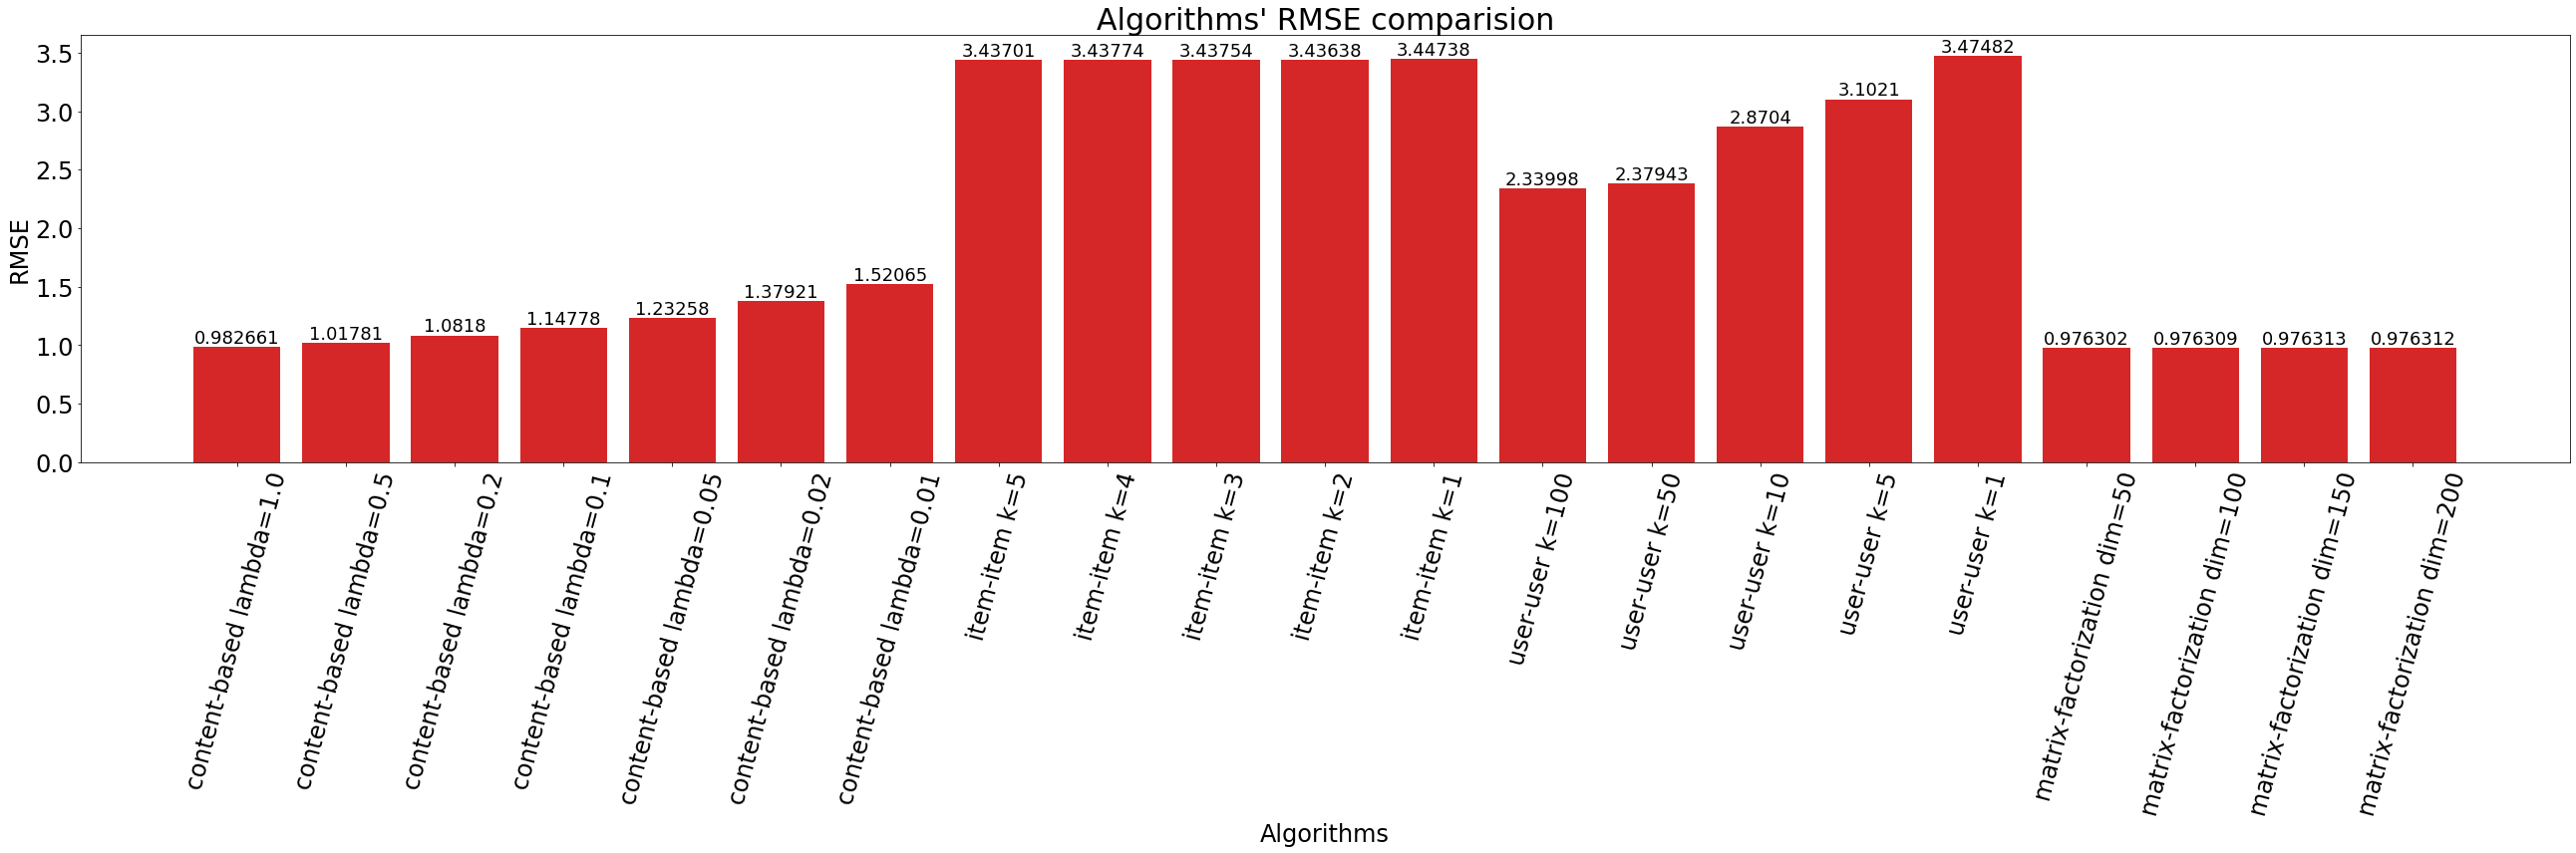

In [22]:
plt.figure(figsize=(36, 12))
bar = plt.bar(
    x=x,
    height=height,
    color='tab:red'
)
plt.gca().bar_label(bar, fontsize=18)
plt.title("Algorithms' RMSE comparision", fontsize=30)
plt.ylabel('RMSE', fontsize=24)
plt.xlabel('Algorithms', fontsize=24)
plt.xticks(fontsize=24, rotation=75)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.savefig("./plot/Algorithms' RMSE comparision.jpg")
plt.show()